<a href="https://colab.research.google.com/github/rahiakela/building-computer-vision-applications-using-artificial-neural-networks/blob/master/4_building_machine_learning%E2%80%93based_computer_vision_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Machine Learning–Based Computer Vision System

Computer vision (CV) is the ability of computers to capture and analyze images and make interpretations and decisions about it. For example, CV can be used to detect and recognize images and to identify patterns or objects within them. 

An artificial intelligence (AI) system ingests images, processes them, extracts features, and makes interpretation about them. In other words, images move from one system or component to another and get transformed into various forms for machines to recognize patterns and detect objects in them.

Images are processed across a set of components performing various types of
transformations that result in a final product. This process is known as the image processing pipeline or computer vision pipeline.

<img src='https://github.com/rahiakela/img-repo/blob/master/building-computer-vision-applications/image-pipeline.png?raw=1' width='800'/>

As shown above, real-world objects are captured by sensing devices, such
as cameras, and converted into digital images. These digital images are processed by computer systems, and final outputs are generated. The outputs may be about the image itself (image classification) or the detection of some patterns and objects embedded in the image.

Let’s examine the data flow pipeline for processing images within a computer system.

<img src='https://github.com/rahiakela/img-repo/blob/master/building-computer-vision-applications/image-pipeline2.png?raw=1' width='800'/>



## Feature Extraction

In machine learning, a feature is an individual measurable property of an object or event being observed. In computer vision, a feature is distinguishing information about the image. Feature extraction is an important step in machine learning. In fact, everything about machine learning revolves around features. It is, therefore, crucial to identify and extract discriminating and independent features for a quality machine learning outcome.

A machine learning model is as good as the features provided for training the model.

### How to Represent Features

Features extracted from an image are represented as a vector, called a feature vector. Let’s understand this with an example. For simplicity, let’s consider a grayscale image. Features of this image are pixel values. We know that the pixels in a grayscale image are organized as a two-dimensional matrix, and each pixel has a value between 0 and 255. If these pixel values are our features, we represent these values as a one-dimensional (1D) row matrix (which is a vector or a 1D array).

For most machine learning algorithms, we will need to extract features and provide it to the algorithm being considered for model training. Some deep learning algorithms, such as convolutional neural networks (CNNs), automatically extract features and then train the models.

## Color Histogram

A histogram is the distribution of pixel intensities in an image. Typically a histogram is visualized in the form of a graph (or chart). The x-axis of this graph represents the pixel values (or a range of values), and the y-axis represents the frequency (or count) of pixels of a particular value or a range of values. The peak of the graph shows the color with the highest number of pixels.

We already know that a pixel can have a value between 0 and 255. That means
the histogram will have 256 values on the x-axis, and the y-axis will have the number of pixels with these values. That’s a lot of numbers on the x-axis. 

For most practical purposes, we divide these pixel values into “bins.” For example, we may divide the x-values into 8 bins where each bin will have 32-pixel colors. We sum up the number of pixels within each bin to calculate the y-values.

The histogram gives an idea of the distribution of color, contrast, and brightness within an image. A grayscale image has only one color channel, but a color image in an RGB scheme will have three channels.

When we plot a histogram of a color image, we generally plot three histograms, one for each channel, to get a better idea of intensity distribution of each color channel. The histogram could be used as features for your machine learning algorithms. There is another interesting use of histograms, which is to enhance the quality of the image. The technique to enhance an image by using a histogram is called histogram equalization.

### How to Calculate a Histogram

We will use Python and OpenCV to calculate a histogram, and we will use pyplot from the Matplotlib package to plot the histogram graph.

OpenCV provides an easy-to-use function to calculate the histogram. Here is the description of the calcHist() function.

### Grayscale Histogram

Let’s write some code to learn how to calculate the histogram of a grayscale image and visualize it as a graph.

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plot
import matplotlib.pyplot as plt

%matplotlib inline

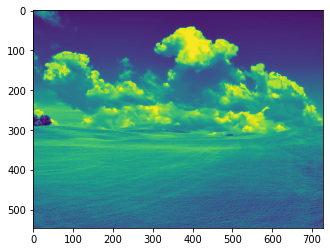

In [7]:
# Read an image and convert it to grayscale
image = cv2.imread("nature.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

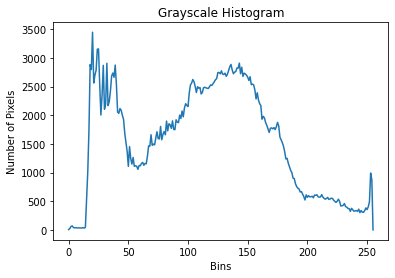

In [10]:
# calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 255])

# Plot histogram graph
plot.figure()
plot.title("Grayscale Histogram")
plot.xlabel("Bins")
plot.ylabel("Number of Pixels")
plot.plot(hist)
plot.show()

The third argument, None, means that we do not want to provide any masking. In other words, we calculate the histogram of all pixels.

The hist variable holds the calculation output. If you print this variable, you will see a bunch of numbers that may not be easy to interpret. To make the interpretation easier, we plot the histogram in the form of a graph.

### RGB Color Histogram

A color image has three channels in an RGB scheme. It is important to note that OpenCV maintains color information in BGR sequence and not in RGB sequence.

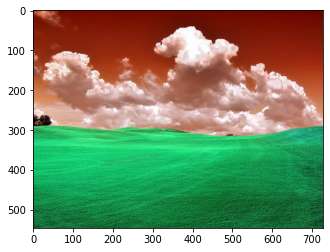

In [13]:
image = cv2.imread("nature.jpg")
plt.imshow(image)

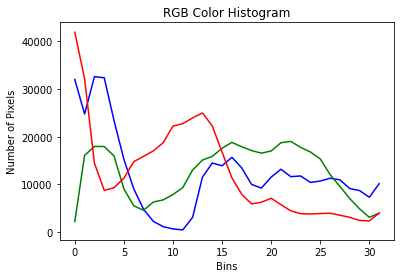

In [15]:
# Remember OpenCV stores color in BGR sequence instead of RBG.
colors = ("blue", "green", "red")

# calculate histogram
for i, color in enumerate(colors):
  hist = cv2.calcHist([image], [i], None, [32], [0, 256])
  # Plot histogram graph
  plot.plot(hist, color=color)

# Plot histogram graph
plot.title("RGB Color Histogram")
plot.xlabel("Bins")
plot.ylabel("Number of Pixels")
plot.show()

Notice again that we have passed [32] as the fourth argument to our calcHist() function. This is to let the function know that we want to calculate the histogram with 32 bins for each of the channels.

The last argument, [0,256], gives the color range.

##Histogram Equalizer